In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
#import pyodbc as odbc

In [2]:
data = pd.read_csv("S_temp_and_rain_dataset.csv")

In [3]:
data

,temp,Month,Year,rain
0,16.976000,1,1901,18.535600
1,19.902600,2,1901,16.254800
2,24.315800,3,1901,70.798100
3,28.183400,4,1901,66.161600
4,27.889200,5,1901,267.215000
...,...,...,...,...
1469,28.586394,6,2023,299.915166
1470,28.533089,7,2023,353.399033
1471,28.451926,8,2023,421.058714
1472,27.737212,9,2023,306.090925


In [4]:
data.head()

,temp,Month,Year,rain
0,16.9760,1,1901,18.5356
1,19.9026,2,1901,16.2548
2,24.3158,3,1901,70.7981
3,28.1834,4,1901,66.1616
4,27.8892,5,1901,267.2150


In [5]:
data.shape

(1474, 4)

In [6]:
data.index

RangeIndex(start=0, stop=1474, step=1)

In [7]:
data.columns

Index(['temp', 'Month', 'Year', 'rain'], dtype='object')

In [8]:
data.nunique()

temp     1460
Month      12
Year      123
rain     1473
dtype: int64

In [9]:
(data.info())
(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1474 entries, 0 to 1473
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    1474 non-null   float64
 1   Month   1474 non-null   int64  
 2   Year    1474 non-null   int64  
 3   rain    1474 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 46.2 KB


,temp,Month,Year,rain
count,1474.000000,1474.000000,1474.000000,1474.000000
mean,25.066443,6.493216,1961.917232,202.817120
std,3.701075,3.450595,35.470764,200.780134
min,15.925161,1.000000,1901.000000,0.000000
25%,22.121579,3.250000,1931.000000,19.382328
50%,27.012950,6.000000,1962.000000,146.412000
75%,28.032675,9.000000,1993.000000,347.571000
max,29.526000,12.000000,2023.000000,1012.020000


In [10]:
data = data.dropna()

In [11]:
data = data.drop_duplicates()

In [12]:
data

,temp,Month,Year,rain
0,16.976000,1,1901,18.535600
1,19.902600,2,1901,16.254800
2,24.315800,3,1901,70.798100
3,28.183400,4,1901,66.161600
4,27.889200,5,1901,267.215000
...,...,...,...,...
1469,28.586394,6,2023,299.915166
1470,28.533089,7,2023,353.399033
1471,28.451926,8,2023,421.058714
1472,27.737212,9,2023,306.090925


In [13]:
''''

DRIVER_NAME = 'SQL SERVER'                      #connect notebook to sql server
SERVER_NAME = 'DESKTOP-7FRNU14\SQLEXPRESS'
DATABASE_NAME = 'S_temp_and_rain_dataset'

#uid<kingC>;
#pwd<12345>;
connection_string = f"""
    DRIVER={{{DRIVER_NAME}}};
    SERVER={SERVER_NAME};
    DATABASE={DATABASE_NAME};
    Trust_Connection = yes;
    

"""
conn = odbc.connect(connection_string)
print(conn)   

'''


<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\utsa7\AppData\Local\Temp\ipykernel_12772\3927160081.py:1: SyntaxWarning: invalid escape sequence '\S'
  ''''


'\'\n\nDRIVER_NAME = \'SQL SERVER\'                      #connect notebook to sql server\nSERVER_NAME = \'DESKTOP-7FRNU14\\SQLEXPRESS\'\nDATABASE_NAME = \'S_temp_and_rain_dataset\'\n\n#uid<kingC>;\n#pwd<12345>;\nconnection_string = f"""\n    DRIVER={{{DRIVER_NAME}}};\n    SERVER={SERVER_NAME};\n    DATABASE={DATABASE_NAME};\n    Trust_Connection = yes;\n    \n\n"""\nconn = odbc.connect(connection_string)\nprint(conn)   \n\n'

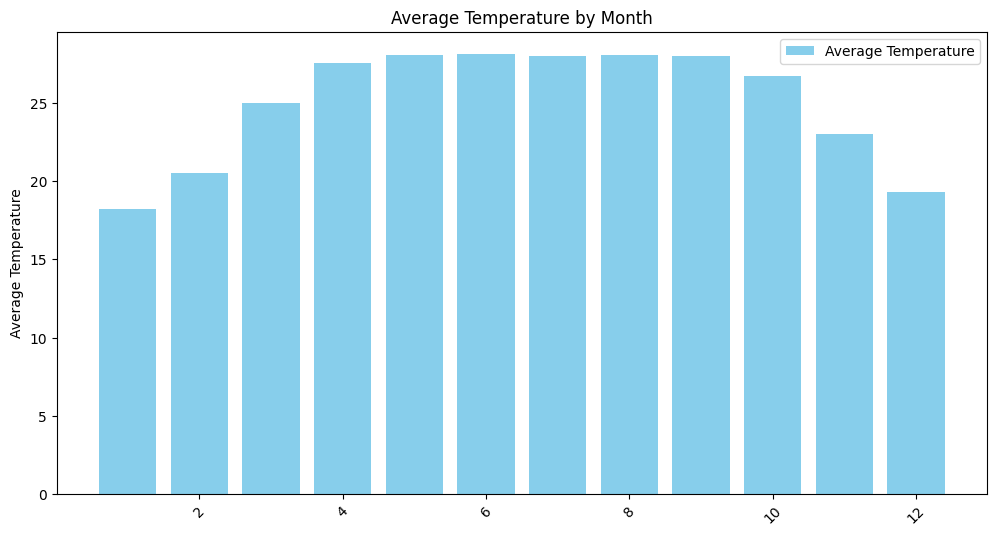

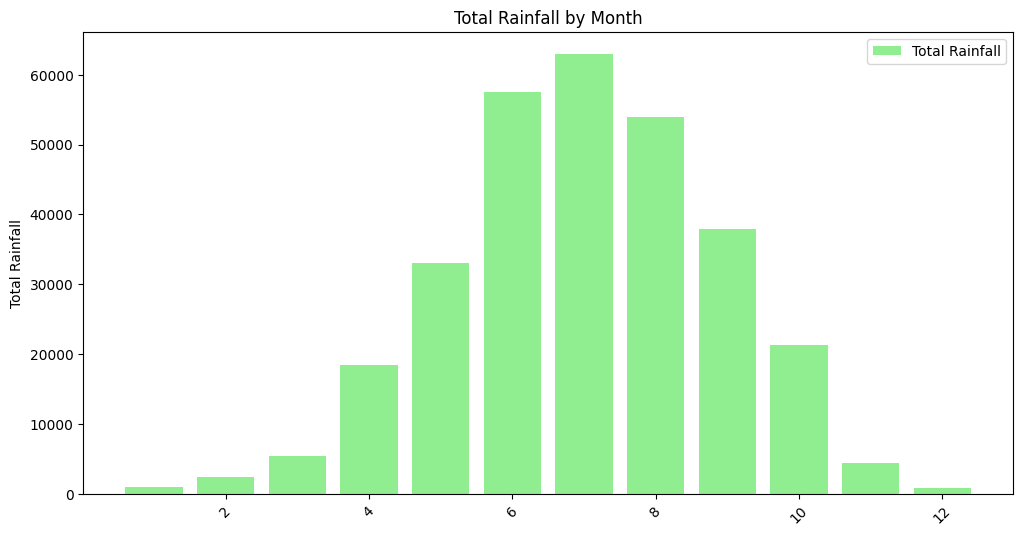

In [14]:
    # Group by Month and calculate the average temperature and total rainfall
monthly_avg_temp = data.groupby('Month')['temp'].mean()
monthly_total_rain = data.groupby('Month')['rain'].sum()

    # Create a bar plot for average temperature
plt.figure(figsize=(12, 6))
plt.bar(monthly_avg_temp.index, monthly_avg_temp, color='skyblue', label='Average Temperature')
plt.ylabel('Average Temperature')
plt.title('Average Temperature by Month')
plt.xticks(rotation=45)
plt.legend()
plt.show()

    # Optionally, you can create a second bar plot for total rainfall
plt.figure(figsize=(12, 6))
plt.bar(monthly_total_rain.index, monthly_total_rain, color='lightgreen', label='Total Rainfall')
plt.ylabel('Total Rainfall')
plt.title('Total Rainfall by Month')
plt.xticks(rotation=45)
plt.legend()
plt.show()

<Axes: >

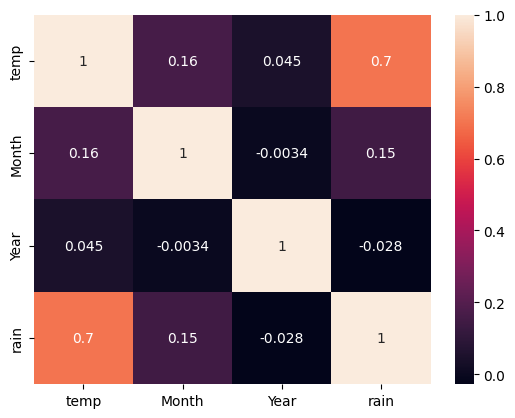

In [15]:
sns.heatmap(data.corr(), annot=True)


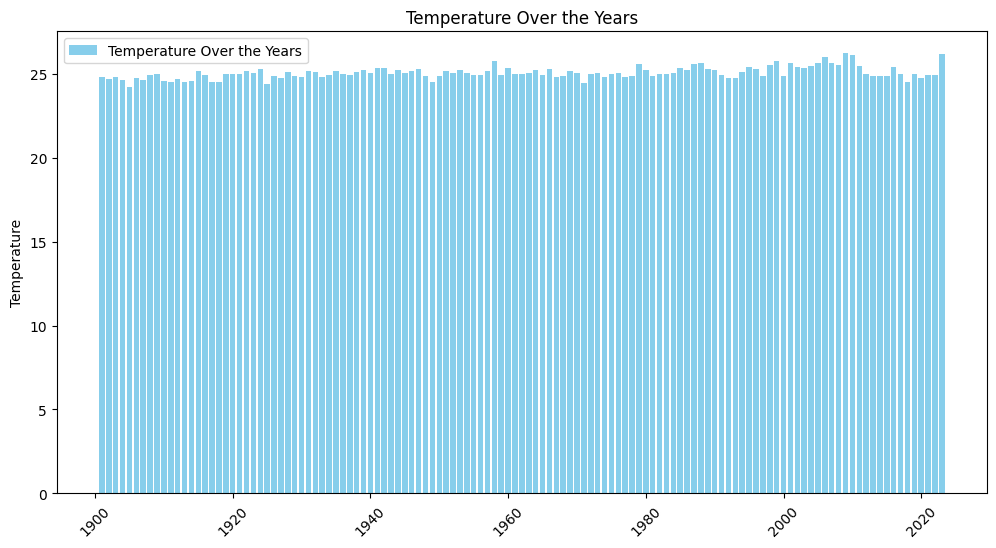

In [16]:
TempOverYears = data.groupby('Year')['temp'].mean()

plt.figure(figsize=(12, 6))
plt.bar(TempOverYears.index, TempOverYears, color='skyblue', label='Temperature Over the Years')
plt.ylabel('Temperature')
plt.title('Temperature Over the Years')
plt.xticks(rotation=45)
plt.legend()
plt.show()